# Week 3 Lab: Data Labeling & Annotation

**CS 203: Software Tools and Techniques for AI**  
**IIT Gandhinagar**

---

## Learning Objectives

By the end of this lab, you will be able to:

1. Set up and use Label Studio for annotation tasks
2. Create annotation interfaces for different data types
3. Write clear annotation guidelines
4. Calculate Inter-Annotator Agreement (IAA) metrics
5. Apply Cohen's Kappa and Fleiss' Kappa to measure label quality
6. Calculate IoU for spatial annotations

---

## Netflix Movie Theme

Continuing from Weeks 1-2, we'll label our cleaned movie reviews for sentiment analysis. This labeled data will be used for model training in later weeks.

---

## Part 1: Environment Setup

### 1.1 Install Required Packages

In [96]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import json

print("All imports successful!")

All imports successful!


---

## Part 2: Sample Data for Annotation

### 2.1 Create Movie Review Dataset

We'll create a set of movie reviews to annotate for sentiment.

In [97]:
# Sample movie reviews for annotation
movie_reviews = [
    {"id": 1, "movie": "Inception", "Casts": "Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page", "review": "Mind-blowing! Nolan does it again with this masterpiece."},
    {"id": 2, "movie": "The Room", "Casts": "Tommy Wiseau, Juliette Danielle, Greg Sestero", "review": "So bad it's good. Hilarious unintentionally."},
    {"id": 3, "movie": "Parasite", "Casts": "Song Kang-ho, Lee Sun-kyun, Choi Woo-shik", "review": "Gripping from start to finish. Deserved every Oscar."},
    {"id": 4, "movie": "Cats", "Casts": "James Corden, Judi Dench, Ian McKellen", "review": "What did I just watch? Truly bizarre."},
    {"id": 5, "movie": "The Godfather", "Casts": "Marlon Brando, Al Paccino, James Caan", "review": "A timeless classic. Perfect in every way."},
    {"id": 6, "movie": "Avatar", "Casts": "Sam Worthington, Zoe Saldana, Sigourney Weaver", "review": "Visually stunning but the story is predictable."},
    {"id": 7, "movie": "The Dark Knight", "Casts": "Christian Bale, Heath Ledger, Aaron Eckhart", "review": "Heath Ledger's Joker is unforgettable."},
    {"id": 8, "movie": "Twilight",  "Casts": "Kristen Stewart, Robert Pattinson, Taylor Lautner", "review": "Not my cup of tea but I can see the appeal."},
    {"id": 9, "movie": "Interstellar", "Casts": "Matthew McConaughey, Anne Hathaway, Jessica Chastain", "review": "Made me cry. Beautiful exploration of love and time."},
    {"id": 10, "movie": "Emoji Movie", "Casts": "T.J. Miller, James Corden, Anna Faris", "review": "Just... no. Avoid at all costs."},
    {"id": 11, "movie": "Pulp Fiction", "Casts": "John Travolta, Samuel L. Jackson, Uma Thurman", "review": "Tarantino's dialogue is unmatched."},
    {"id": 12, "movie": "Sharknado",  "Casts": "Ian Ziering, Tara Reid, John Heard", "review": "Ridiculous premise but entertaining in a weird way."},
    {"id": 13, "movie": "The Shawshank Redemption", "Casts": "Tim Robbins, Morgan Freeman, Bob Gunton", "review": "Hope is a good thing. Best movie ever made."},
    {"id": 14, "movie": "Transformers 5", "Casts": "Mark Wahlberg, Anthony Hopkins, Isabela Moner", "review": "Explosions. That's it. That's the review."},
    {"id": 15, "movie": "La La Land", "Casts": "Ryan Gosling, Emma Stone, John Legend", "review": "Bittersweet ending that stays with you."},
    {"id": 16, "movie": "Batman v Superman",  "Casts": "Ben Affleck, Henry Cavill, Amy Adams", "review": "Had potential but ended up being a mess."},
    {"id": 17, "movie": "Spirited Away", "Casts": "Rumi Hiiragi, Miyu Irino, Mari Natsuki", "review": "Miyazaki's imagination knows no bounds."},
    {"id": 18, "movie": "The Last Airbender", "Casts": "Noah Ringer, Nicola Peltz, Jackson Rathbone", "review": "An insult to the animated series fans."},
    {"id": 19, "movie": "Coco", "Casts": "Anthony Gonzalez, Gael García Bernal, Benjamin Bratt", "review": "Pixar at its finest. Remember me..."},
    {"id": 20, "movie": "Justice League", "Casts": "Ben Affleck, Henry Cavill, Gal Gadot", "review": "Okay but nothing special. Just okay."},
]

df_reviews = pd.DataFrame(movie_reviews)
print(f"Created {len(df_reviews)} movie reviews for annotation")
df_reviews.head()

Created 20 movie reviews for annotation


,id,movie,Casts,review
0,1,Inception,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",Mind-blowing! Nolan does it again with this ma...
1,2,The Room,"Tommy Wiseau, Juliette Danielle, Greg Sestero",So bad it's good. Hilarious unintentionally.
2,3,Parasite,"Song Kang-ho, Lee Sun-kyun, Choi Woo-shik",Gripping from start to finish. Deserved every ...
3,4,Cats,"James Corden, Judi Dench, Ian McKellen",What did I just watch? Truly bizarre.
4,5,The Godfather,"Marlon Brando, Al Paccino, James Caan",A timeless classic. Perfect in every way.


### Question 2.1 (Solved): Export Data for Label Studio

Export the reviews in Label Studio's expected JSON format.

In [98]:
# SOLVED: Export for Label Studio
def export_for_label_studio(df, text_column='review'):
    """
    Export DataFrame to Label Studio JSON format.
    
    Label Studio expects a list of objects with a 'data' field.
    """
    tasks = []
    for _, row in df.iterrows():
        task = {
            "data": {
                "id": int(row['id']),
                "movie": row['movie'],
                "text": row[text_column]
            }
        }
        tasks.append(task)
    return tasks

tasks = export_for_label_studio(df_reviews)

# Save to file
with open('movie_reviews_for_labeling.json', 'w') as f:
    json.dump(tasks, f, indent=2)

print("Exported to movie_reviews_for_labeling.json")
print("\nSample task:")
print(json.dumps(tasks[0], indent=2))

Exported to movie_reviews_for_labeling.json

Sample task:
{
  "data": {
    "id": 1,
    "movie": "Inception",
    "text": "Mind-blowing! Nolan does it again with this masterpiece."
  }
}


### Question 2.2: Add More Fields for Export

Modify the export function to also include the movie title in the Label Studio interface.

In [99]:
# TODO: Modify the export function to include movie title
# The Label Studio interface should show both movie title and review

# Your code here


---

## Part 3: Label Studio Configuration

### 3.1 Understanding Label Studio XML Configs

Label Studio uses XML to define annotation interfaces.

In [100]:
# Text Classification Config for Sentiment Analysis
sentiment_config = '''
<View>
  <Header value="Movie Review Sentiment Analysis"/>
  <Text name="text" value="$text"/>
  <Choices name="sentiment" toName="text" choice="single">
    <Choice value="Positive" hotkey="1"/>
    <Choice value="Negative" hotkey="2"/>
    <Choice value="Neutral" hotkey="3"/>
    <Choice value="Mixed" hotkey="4"/>
  </Choices>
</View>
'''

print("Sentiment Classification Config:")
print(sentiment_config)

Sentiment Classification Config:

<View>
  <Header value="Movie Review Sentiment Analysis"/>
  <Text name="text" value="$text"/>
  <Choices name="sentiment" toName="text" choice="single">
    <Choice value="Positive" hotkey="1"/>
    <Choice value="Negative" hotkey="2"/>
    <Choice value="Neutral" hotkey="3"/>
    <Choice value="Mixed" hotkey="4"/>
  </Choices>
</View>



### Question 3.1 (Solved): Create NER Config

Create a Label Studio config for Named Entity Recognition on movie reviews.

In [101]:
# SOLVED: NER Config for Movie Reviews
ner_config = '''
<View>
  <Header value="Movie Entity Annotation"/>
  <Labels name="ner" toName="text">
    <Label value="MOVIE_TITLE" background="#FF0000"/>
    <Label value="ACTOR" background="#00FF00"/>
    <Label value="DIRECTOR" background="#0000FF"/>
    <Label value="CHARACTER" background="#FFA500"/>
    <Label value="AWARD" background="#800080"/>
  </Labels>
  <Text name="text" value="$text"/>
</View>
'''

print("NER Config for Movie Reviews:")
print(ner_config)

NER Config for Movie Reviews:

<View>
  <Header value="Movie Entity Annotation"/>
  <Labels name="ner" toName="text">
    <Label value="MOVIE_TITLE" background="#FF0000"/>
    <Label value="ACTOR" background="#00FF00"/>
    <Label value="DIRECTOR" background="#0000FF"/>
    <Label value="CHARACTER" background="#FFA500"/>
    <Label value="AWARD" background="#800080"/>
  </Labels>
  <Text name="text" value="$text"/>
</View>



### Question 3.2: Create Multi-Label Classification Config

Create a config that allows multiple labels per review (e.g., "Funny", "Emotional", "Action-packed").

In [102]:
# TODO: Create multi-label classification config
# Hint: Use choice="multiple" instead of choice="single"

# Your config here
classification_config = '''
<View>
  <Header value="Multi-label movie sentiment classification Analysis"/>
  <Text name="text" value="$text"/>
  <Choices name="sentiment" toName="text" choice="multiple">
    <Choice value="Funny" hotkey="1"/>
    <Choice value="Emotional" hotkey="2"/>
    <Choice value="Action-Packed" hotkey="3"/>
    <Choice value="Thriller" hotkey="4"/>
  </Choices>
</View>
'''

print("Multi-label movie sentiment classification Config:")
print(classification_config)

Multi-label movie sentiment classification Config:

<View>
  <Header value="Multi-label movie sentiment classification Analysis"/>
  <Text name="text" value="$text"/>
  <Choices name="sentiment" toName="text" choice="multiple">
    <Choice value="Funny" hotkey="1"/>
    <Choice value="Emotional" hotkey="2"/>
    <Choice value="Action-Packed" hotkey="3"/>
    <Choice value="Thriller" hotkey="4"/>
  </Choices>
</View>



### Question 3.3: Create Image Classification Config

Create a config for classifying movie poster genres.

In [103]:
# TODO: Create image classification config for movie poster genre classification
# Include genres: Action, Comedy, Drama, Horror, Sci-Fi, Romance

# Your config here
image_classification_config = '''
<View>
    <Header value="Movie Poster Genre Classification"/>
    <Image name="poster" value="$image_url"/>
    <Choices name="genre" toName="poster" choice="multiple">
        <Choice value="Action" hotkey="1"/>
        <Choice value="Comedy" hotkey="2"/>
        <Choice value="Drama" hotkey="3"/>
        <Choice value="Horror" hotkey="4"/>
        <Choice value="Sci-Fi" hotkey="5"/>
        <Choice value="Romance" hotkey="6"/>
    </Choices>
</View>
'''

print("Image Classification Config for Movie Poster Genre:")
print(image_classification_config)

Image Classification Config for Movie Poster Genre:

<View>
    <Header value="Movie Poster Genre Classification"/>
    <Image name="poster" value="$image_url"/>
    <Choices name="genre" toName="poster" choice="multiple">
        <Choice value="Action" hotkey="1"/>
        <Choice value="Comedy" hotkey="2"/>
        <Choice value="Drama" hotkey="3"/>
        <Choice value="Horror" hotkey="4"/>
        <Choice value="Sci-Fi" hotkey="5"/>
        <Choice value="Romance" hotkey="6"/>
    </Choices>
</View>



---

## Part 4: Annotation Guidelines

### 4.1 Writing Clear Guidelines

Good annotation guidelines are crucial for consistent labels.

In [104]:
# Example annotation guidelines
annotation_guidelines = """
# Movie Review Sentiment Annotation Guidelines

## Task Overview
Classify movie reviews into sentiment categories based on the reviewer's opinion of the movie.

## Label Definitions

### POSITIVE
The reviewer clearly enjoyed the movie and recommends it.

**Examples:**
- "Mind-blowing! Nolan does it again with this masterpiece."
- "Best movie I've seen this year. A must-watch!"
- "Perfect in every way. 10/10."

### NEGATIVE
The reviewer clearly did not enjoy the movie and does not recommend it.

**Examples:**
- "Avoid at all costs. Complete waste of time."
- "An insult to the animated series fans."
- "Just... no. Terrible."

### NEUTRAL
The reviewer has no strong opinion either way, or the review is purely factual.

**Examples:**
- "It's okay. Nothing special."
- "The movie is 2 hours long and features action scenes."
- "Just okay."

### MIXED
The review contains both positive and negative aspects.

**Examples:**
- "Visually stunning but the story is predictable."
- "Great acting but poor direction."
- "Had potential but ended up being a mess."

## Edge Cases

### Sarcasm
If sarcasm is detected, label based on the ACTUAL meaning, not the literal words.
- "Oh great, another superhero movie. Just what we needed." → NEGATIVE

### "So bad it's good"
Movies praised ironically should be labeled MIXED (enjoyment exists but film quality is poor).
- "So bad it's good. Hilarious unintentionally." → MIXED

### Qualified Praise/Criticism
If the reviewer has reservations, use MIXED.
- "Not my cup of tea but I can see the appeal." → NEUTRAL (not recommending but not criticizing)

## When in Doubt
1. Re-read the review
2. Ask: "Would the reviewer recommend this movie?"
3. If still unclear, use NEUTRAL
"""

print(annotation_guidelines)


# Movie Review Sentiment Annotation Guidelines

## Task Overview
Classify movie reviews into sentiment categories based on the reviewer's opinion of the movie.

## Label Definitions

### POSITIVE
The reviewer clearly enjoyed the movie and recommends it.

**Examples:**
- "Mind-blowing! Nolan does it again with this masterpiece."
- "Best movie I've seen this year. A must-watch!"
- "Perfect in every way. 10/10."

### NEGATIVE
The reviewer clearly did not enjoy the movie and does not recommend it.

**Examples:**
- "Avoid at all costs. Complete waste of time."
- "An insult to the animated series fans."
- "Just... no. Terrible."

### NEUTRAL
The reviewer has no strong opinion either way, or the review is purely factual.

**Examples:**
- "It's okay. Nothing special."
- "The movie is 2 hours long and features action scenes."
- "Just okay."

### MIXED
The review contains both positive and negative aspects.

**Examples:**
- "Visually stunning but the story is predictable."
- "Great acting but p

### Question 4.1: Add Edge Cases to Guidelines

What other edge cases should be added to these guidelines?

In [105]:
# TODO: Write 3 additional edge cases that should be covered in the guidelines
# Consider: emojis, ratings, comparisons to other movies, etc.
# Your edge cases here
additional_edge_cases = """
### Edge Case 1: Emoji-Only or Emoji-Heavy Reviews
Reviews may contain only emojis or use emojis to express sentiment instead of words.
Annotators should infer sentiment from commonly accepted emoji meanings.

Example:
"🔥🔥🔥"
"😴😴😴"
"🤯👏"

Guideline:
- 🔥, ❤️, 👏 → Positive
- 😴, 🤮, 💀 → Negative
- Mixed emojis → Neutral or Mixed depending on context


### Edge Case 2: Explicit Ratings Without Explanation
Some reviews express sentiment only through numeric or star ratings, without descriptive text.

Example:
"10/10"
"⭐️⭐️⭐️⭐️⭐️"
"2 out of 5"

Guideline:
- High ratings (4–5 stars, 8–10/10) → Positive
- Low ratings (1–2 stars, 1–4/10) → Negative
- Mid ratings (3 stars, 5–6/10) → Neutral


### Edge Case 3: Comparisons to Other Movies
Reviews may express sentiment indirectly by comparing the movie to another film.

Example:
"Not as good as The Dark Knight."
"Better than the first one."
"This makes Transformers look like a masterpiece."

Guideline:
- Determine sentiment toward the *target movie*, not the referenced one
- Negative comparison → Negative sentiment
- Positive comparison → Positive sentiment
- Ambiguous comparison → Neutral
"""

print("Additional Edge Cases:")
print(additional_edge_cases)

Additional Edge Cases:

### Edge Case 1: Emoji-Only or Emoji-Heavy Reviews
Reviews may contain only emojis or use emojis to express sentiment instead of words.
Annotators should infer sentiment from commonly accepted emoji meanings.

Example:
"🔥🔥🔥"
"😴😴😴"
"🤯👏"

Guideline:
- 🔥, ❤️, 👏 → Positive
- 😴, 🤮, 💀 → Negative
- Mixed emojis → Neutral or Mixed depending on context


### Edge Case 2: Explicit Ratings Without Explanation
Some reviews express sentiment only through numeric or star ratings, without descriptive text.

Example:
"10/10"
"⭐️⭐️⭐️⭐️⭐️"
"2 out of 5"

Guideline:
- High ratings (4–5 stars, 8–10/10) → Positive
- Low ratings (1–2 stars, 1–4/10) → Negative
- Mid ratings (3 stars, 5–6/10) → Neutral


### Edge Case 3: Comparisons to Other Movies
Reviews may express sentiment indirectly by comparing the movie to another film.

Example:
"Not as good as The Dark Knight."
"Better than the first one."
"This makes Transformers look like a masterpiece."

Guideline:
- Determine sentiment tow

---

## Part 5: Simulating Annotations

### 5.1 Creating Simulated Annotator Data

For this lab, we'll simulate multiple annotators to practice IAA calculations.

In [106]:
# Simulated annotations from two annotators
np.random.seed(42)

# Ground truth labels (for simulation)
ground_truth = ['Positive', 'Mixed', 'Positive', 'Negative', 'Positive',
                'Mixed', 'Positive', 'Neutral', 'Positive', 'Negative',
                'Positive', 'Mixed', 'Positive', 'Negative', 'Mixed',
                'Negative', 'Positive', 'Negative', 'Positive', 'Neutral']

def simulate_annotator(true_labels, accuracy):
    labels = ['Positive', 'Negative', 'Neutral', 'Mixed']
    annotations = []
    for true_label in true_labels:
        if np.random.random() < accuracy:
            annotations.append(true_label)
        else:
            # Random different label
            other_labels = [l for l in labels if l != true_label]
            annotations.append(str(np.random.choice(other_labels)))
    return annotations

annotator1 = simulate_annotator(ground_truth, accuracy=0.85)
annotator2 = simulate_annotator(ground_truth, accuracy=0.80)
annotator3 = simulate_annotator(ground_truth, accuracy=0.75)

# Create DataFrame
annotations_df = pd.DataFrame({
    'review_id': range(1, 21),
    'annotator_1': annotator1,
    'annotator_2': annotator2,
    'annotator_3': annotator3,
    'ground_truth': ground_truth
})

print("Simulated Annotations:")
annotations_df

Simulated Annotations:


,review_id,annotator_1,annotator_2,annotator_3,ground_truth
0,1,Positive,Positive,Neutral,Positive
1,2,Neutral,Mixed,Mixed,Mixed
2,3,Positive,Positive,Positive,Positive
3,4,Negative,Negative,Negative,Negative
4,5,Positive,Positive,Positive,Positive
5,6,Mixed,Mixed,Mixed,Mixed
6,7,Positive,Positive,Neutral,Positive
7,8,Neutral,Neutral,Neutral,Neutral
8,9,Positive,Positive,Positive,Positive
9,10,Negative,Negative,Mixed,Negative


### Question 5.1 (Solved): Calculate Percent Agreement

Calculate the simple percent agreement between annotators.

In [107]:
# SOLVED: Calculate percent agreement
def percent_agreement(labels1, labels2):
    """
    Calculate the percentage of items where two annotators agree.
    """
    agreements = sum(l1 == l2 for l1, l2 in zip(labels1, labels2))
    return agreements / len(labels1)

# Calculate pairwise agreements
pa_1_2 = percent_agreement(annotator1, annotator2)
pa_1_3 = percent_agreement(annotator1, annotator3)
pa_2_3 = percent_agreement(annotator2, annotator3)

print(f"Percent Agreement (Annotator 1 vs 2): {pa_1_2:.2%}")
print(f"Percent Agreement (Annotator 1 vs 3): {pa_1_3:.2%}")
print(f"Percent Agreement (Annotator 2 vs 3): {pa_2_3:.2%}")
print(f"\nAverage Pairwise Agreement: {(pa_1_2 + pa_1_3 + pa_2_3) / 3:.2%}")

Percent Agreement (Annotator 1 vs 2): 85.00%
Percent Agreement (Annotator 1 vs 3): 55.00%
Percent Agreement (Annotator 2 vs 3): 55.00%

Average Pairwise Agreement: 65.00%


### Question 5.2: Why is Percent Agreement Not Enough?

Explain the limitation of percent agreement.

In [108]:
# TODO: Write your explanation here
# Hint: Consider what happens with random guessing in a binary classification task

explanation = """
Percentage agreement is limited because it does not account for agreement that occurs by chance.
In a binary classification task, two annotators who guess labels randomly would still agree about
50% of the time simply due to chance. As a result, a 50% agreement rate does not necessarily indicate
any real consistency or reliability between annotators.

This problem becomes more severe when class distributions are imbalanced. For example, if one label
(e.g., Positive) dominates the dataset, annotators could achieve a high percentage agreement by
frequently choosing that label, even if they are not carefully evaluating each instance.

Because percentage agreement cannot distinguish between true agreement and chance agreement, it can
overestimate annotation reliability. This is why chance-corrected metrics such as Cohen’s Kappa or
Krippendorff’s Alpha are preferred for evaluating inter-annotator agreement.
"""
print("Explanation of limitations of percent agreement:")
print(explanation)

Explanation of limitations of percent agreement:

Percentage agreement is limited because it does not account for agreement that occurs by chance.
In a binary classification task, two annotators who guess labels randomly would still agree about
50% of the time simply due to chance. As a result, a 50% agreement rate does not necessarily indicate
any real consistency or reliability between annotators.

This problem becomes more severe when class distributions are imbalanced. For example, if one label
(e.g., Positive) dominates the dataset, annotators could achieve a high percentage agreement by
frequently choosing that label, even if they are not carefully evaluating each instance.

Because percentage agreement cannot distinguish between true agreement and chance agreement, it can
overestimate annotation reliability. This is why chance-corrected metrics such as Cohen’s Kappa or
Krippendorff’s Alpha are preferred for evaluating inter-annotator agreement.



---

## Part 6: Cohen's Kappa

### 6.1 Understanding Cohen's Kappa

Cohen's Kappa accounts for agreement by chance.

In [109]:
# Cohen's Kappa formula explanation
print("""
Cohen's Kappa Formula:

           P_observed - P_expected
kappa = ────────────────────────────
               1 - P_expected

Where:
- P_observed = Actual agreement rate
- P_expected = Expected agreement by chance

Interpretation:
- kappa < 0.00: Poor (worse than chance)
- 0.00 - 0.20: Slight
- 0.21 - 0.40: Fair
- 0.41 - 0.60: Moderate
- 0.61 - 0.80: Substantial
- 0.81 - 1.00: Almost Perfect
""")


Cohen's Kappa Formula:

           P_observed - P_expected
kappa = ────────────────────────────
               1 - P_expected

Where:
- P_observed = Actual agreement rate
- P_expected = Expected agreement by chance

Interpretation:
- kappa < 0.00: Poor (worse than chance)
- 0.00 - 0.20: Slight
- 0.21 - 0.40: Fair
- 0.41 - 0.60: Moderate
- 0.61 - 0.80: Substantial
- 0.81 - 1.00: Almost Perfect



### Question 6.1 (Solved): Calculate Cohen's Kappa Step-by-Step

In [110]:
# SOLVED: Manual Cohen's Kappa calculation
def cohens_kappa_manual(labels1, labels2):
    """
    Calculate Cohen's Kappa step by step.
    """
    # Step 1: Create confusion matrix
    unique_labels = sorted(set(labels1) | set(labels2))
    n = len(labels1)
    
    # Count agreements and marginals
    confusion = {}
    for l1 in unique_labels:
        confusion[l1] = {l2: 0 for l2 in unique_labels}
    
    for l1, l2 in zip(labels1, labels2):
        confusion[l1][l2] += 1
    
    confusion_df = pd.DataFrame(confusion).T
    print("Confusion Matrix:")
    print(confusion_df)

    # Step 2: Calculate observed agreement
    p_observed = sum(confusion[l][l] for l in unique_labels) / n
    
    # Step 3: Calculate expected agreement
    # Calculate the marginals which means the proportion of each label assigned by each annotator
    marginals_1 = {l: sum(1 for x in labels1 if x == l) / n for l in unique_labels}
    marginals_2 = {l: sum(1 for x in labels2 if x == l) / n for l in unique_labels}
        
    p_expected = sum(marginals_1[l] * marginals_2[l] for l in unique_labels)
    
    # Step 4: Calculate kappa
    kappa = (p_observed - p_expected) / (1 - p_expected)
    
    print(f"Observed Agreement (P_o): {p_observed:.4f}")
    print(f"Expected Agreement (P_e): {p_expected:.4f}")
    print(f"Cohen's Kappa: {kappa:.4f}")
    
    return kappa

print("Annotator 1 vs Annotator 2:")
kappa_1_2 = cohens_kappa_manual(annotator1, annotator2)

print("\n" + "="*50 + "\n")

# Verify with sklearn
from sklearn.metrics import cohen_kappa_score
sklearn_kappa = cohen_kappa_score(annotator1, annotator2)
print(f"Sklearn Cohen's Kappa: {sklearn_kappa:.4f}")

Annotator 1 vs Annotator 2:
Confusion Matrix:
          Mixed  Negative  Neutral  Positive
Mixed         3         0        0         0
Negative      0         4        0         1
Neutral       2         0        2         0
Positive      0         0        0         8
Observed Agreement (P_o): 0.8500
Expected Agreement (P_e): 0.2875
Cohen's Kappa: 0.7895


Sklearn Cohen's Kappa: 0.7895


### Question 6.2: Calculate All Pairwise Kappas

In [111]:
# TODO: Calculate Cohen's Kappa for all pairs of annotators
# Use sklearn's cohen_kappa_score function
annotators = [annotator1, annotator2, annotator3]
for i in range(len(annotators)):
    for j in range(i + 1, len(annotators)):
        kappa = cohen_kappa_score(annotators[i], annotators[j])
        print(f"Cohen's Kappa (Annotator {i+1} vs Annotator {j+1}): {kappa:.4f}")

Cohen's Kappa (Annotator 1 vs Annotator 2): 0.7895
Cohen's Kappa (Annotator 1 vs Annotator 3): 0.3878
Cohen's Kappa (Annotator 2 vs Annotator 3): 0.3793


### Question 6.3: Visualize Agreement with Confusion Matrix

Confusion Matrix Data:
[[3 0 0 0]
 [0 4 0 1]
 [2 0 2 0]
 [0 0 0 8]]


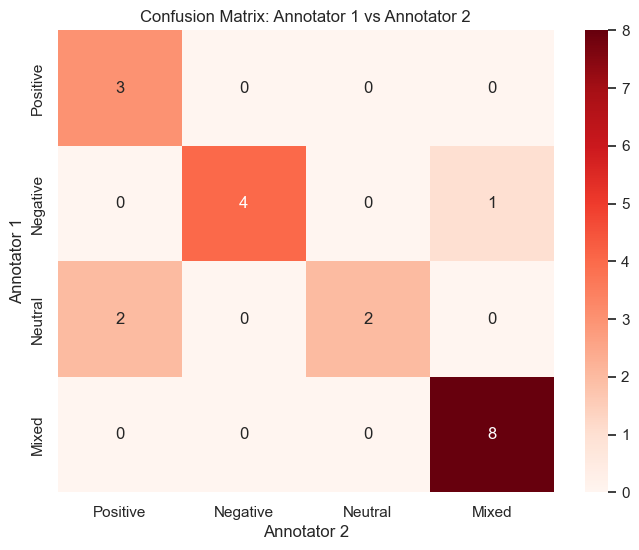

In [112]:
# TODO: Create a confusion matrix heatmap for Annotator 1 vs Annotator 2
# Hint: Use sklearn's confusion_matrix and seaborn's heatmap

# Your code here
confusion_matrix_data = confusion_matrix(annotator1, annotator2)
print("Confusion Matrix Data:")
print(confusion_matrix_data)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Positive', 'Negative', 'Neutral', 'Mixed'],
            yticklabels=['Positive', 'Negative', 'Neutral', 'Mixed'])
plt.xlabel('Annotator 2')
plt.ylabel('Annotator 1')
plt.title('Confusion Matrix: Annotator 1 vs Annotator 2')
plt.show()

---

## Part 7: Fleiss' Kappa for Multiple Annotators

### 7.1 Understanding Fleiss' Kappa

When you have more than 2 annotators, use Fleiss' Kappa.

In [113]:
# Fleiss' Kappa using statsmodels
from statsmodels.stats.inter_rater import fleiss_kappa, aggregate_raters

# Prepare data for Fleiss' Kappa
# Format: (n_items, n_categories) matrix with counts

labels = ['Positive', 'Negative', 'Neutral', 'Mixed']
n_items = len(annotator1)

# Create matrix
data_matrix = []
for i in range(n_items):
    row = [0, 0, 0, 0]  # Counts for each category
    for ann in [annotator1[i], annotator2[i], annotator3[i]]:
        row[labels.index(ann)] += 1
    data_matrix.append(row)

data_matrix = np.array(data_matrix)
print("Data matrix shape:", data_matrix.shape)
print("\nFirst 5 rows (counts per category):")
print(pd.DataFrame(data_matrix, columns=labels))

Data matrix shape: (20, 4)

First 5 rows (counts per category):
    Positive  Negative  Neutral  Mixed
0          2         0        1      0
1          0         0        1      2
2          3         0        0      0
3          0         3        0      0
4          3         0        0      0
5          0         0        0      3
6          2         0        1      0
7          0         0        3      0
8          3         0        0      0
9          0         2        0      1
10         2         0        1      0
11         0         0        0      3
12         1         0        2      0
13         1         2        0      0
14         0         0        0      3
15         0         3        0      0
16         2         0        1      0
17         1         2        0      0
18         3         0        0      0
19         1         0        1      1


### Question 7.1 (Solved): Calculate Fleiss' Kappa

In [114]:
# SOLVED: Calculate Fleiss' Kappa
fk = fleiss_kappa(data_matrix)
print(f"Fleiss' Kappa (3 annotators): {fk:.4f}")

# Interpret
if fk < 0:
    print("Interpretation: Poor (worse than chance)")
elif fk < 0.20:
    print("Interpretation: Slight agreement")
elif fk < 0.40:
    print("Interpretation: Fair agreement")
elif fk < 0.60:
    print("Interpretation: Moderate agreement")
elif fk < 0.80:
    print("Interpretation: Substantial agreement")
else:
    print("Interpretation: Almost perfect agreement")

Fleiss' Kappa (3 annotators): 0.5135
Interpretation: Moderate agreement


### Question 7.2: How Would You Improve Agreement?

Based on the Fleiss' Kappa score, what actions would you take?

In [115]:
# TODO: Write 3 specific actions to improve annotator agreement

improvement_actions = """
1. Refine and expand the annotation guidelines with clearer definitions and edge cases  
   Clarify boundaries between similar labels (e.g., Neutral vs Mixed), add concrete examples,
   and explicitly address tricky cases such as sarcasm, emojis, ratings-only reviews, and
   comparisons to other movies.

2. Conduct annotator calibration and training sessions  
   Have annotators label a shared subset of examples, then review disagreements together to
   discuss reasoning and align interpretations before continuing with the full dataset.

3. Introduce adjudication and feedback loops  
   Assign a senior annotator or reviewer to resolve disagreements and provide feedback, and
   periodically re-evaluate agreement scores to identify recurring sources of confusion.
"""


---

## Part 8: IoU for Spatial Annotations

### 8.1 Intersection over Union (IoU)

For bounding boxes and segmentation, we use IoU to measure agreement.

In [116]:
# IoU explanation
print("""
Intersection over Union (IoU):

           Area of Overlap
IoU = ─────────────────────────
           Area of Union

      ┌─────────────┐
      │    ┌────────┼───────┐
      │    │/////////│        │
      │    │//Ovrlp//│        │
      └────┼────────┘        │
           │                  │
           └────────────────┘

IoU = Overlap / (Box1 + Box2 - Overlap)

Thresholds:
- IoU > 0.5: Match (standard)
- IoU > 0.7: Good match
- IoU > 0.9: Excellent match
""")


Intersection over Union (IoU):

           Area of Overlap
IoU = ─────────────────────────
           Area of Union

      ┌─────────────┐
      │    ┌────────┼───────┐
      │    │/////////│        │
      │    │//Ovrlp//│        │
      └────┼────────┘        │
           │                  │
           └────────────────┘

IoU = Overlap / (Box1 + Box2 - Overlap)

Thresholds:
- IoU > 0.5: Match (standard)
- IoU > 0.7: Good match
- IoU > 0.9: Excellent match



### Question 8.1 (Solved): Implement IoU Calculation

In [117]:
# SOLVED: IoU Implementation
def calculate_iou(box1, box2):
    """
    Calculate IoU between two bounding boxes.
    
    Args:
        box1, box2: Lists of [x1, y1, x2, y2] coordinates
    
    Returns:
        IoU value (0 to 1)
    """
    # Calculate intersection coordinates
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    
    # Check for no overlap
    if x2 < x1 or y2 < y1:
        return 0.0
    
    # Calculate areas
    intersection = (x2 - x1) * (y2 - y1)
    
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    union = area1 + area2 - intersection
    
    return intersection / union

# Test cases
# It is in xyxy format
box1 = [0, 0, 100, 100]  # 100x100 box at origin
box2 = [50, 50, 150, 150]  # 100x100 box shifted by 50
box3 = [200, 200, 300, 300]  # No overlap
box4 = [25, 25, 75, 75]  # Contained within box1

print(f"IoU(box1, box2): {calculate_iou(box1, box2):.4f}")  # Partial overlap
print(f"IoU(box1, box3): {calculate_iou(box1, box3):.4f}")  # No overlap
print(f"IoU(box1, box4): {calculate_iou(box1, box4):.4f}")  # One inside other

IoU(box1, box2): 0.1429
IoU(box1, box3): 0.0000
IoU(box1, box4): 0.2500


### Question 8.2: Calculate IoU for Movie Poster Annotations

Two annotators drew bounding boxes around movie titles on posters. Calculate their IoU.

In [118]:
# Bounding box annotations from two annotators
poster_annotations = [
    {"poster": "Inception", "ann1": [100, 50, 300, 100], "ann2": [95, 55, 305, 98]},
    {"poster": "The Matrix", "ann1": [50, 100, 250, 180], "ann2": [60, 105, 240, 175]},
    {"poster": "Avatar", "ann1": [120, 80, 280, 150], "ann2": [125, 78, 275, 155]},
    {"poster": "Titanic", "ann1": [80, 60, 320, 120], "ann2": [100, 70, 310, 115]},
]

# TODO: Calculate IoU for each poster and compute the mean IoU

# Your code here
sum_iou = 0
for annotation in poster_annotations:
    iou = calculate_iou(annotation['ann1'], annotation['ann2'])
    print(f"For movie {annotation['poster']} the IoU is: {iou:.2f}")
    sum_iou += iou

print(f"The mean IoU of for all the posters is: {sum_iou/len(poster_annotations):.2f}")


For movie Inception the IoU is: 0.82
For movie The Matrix the IoU is: 0.79
For movie Avatar the IoU is: 0.86
For movie Titanic the IoU is: 0.66
The mean IoU of for all the posters is: 0.78


### Question 8.3: Visualize Bounding Box Overlap

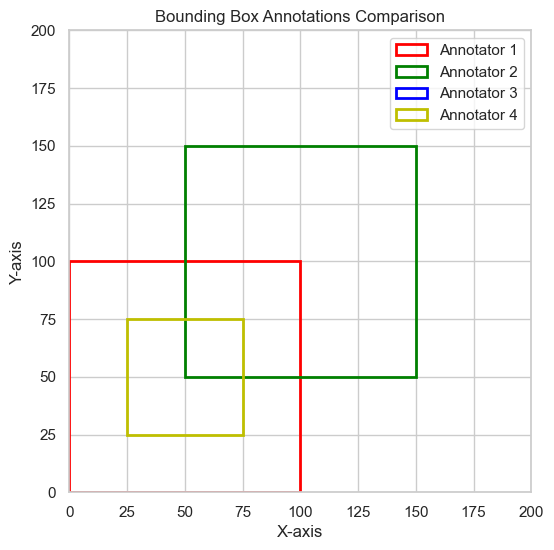

In [119]:
# TODO: Create a visualization showing two overlapping bounding boxes
# Use matplotlib to draw rectangles
# Hint: matplotlib.patches.Rectangle

# Your code here
import matplotlib.patches as patches
fig, ax = plt.subplots(1, figsize=(8, 6))
# Define two boxes
box_a = patches.Rectangle((box1[0], box1[1]), box1[2]-box1[0], box1[3]-box1[1], linewidth=2, edgecolor='r', facecolor='none', label='Annotator 1')
box_b = patches.Rectangle((box2[0], box2[1]), box2[2]-box2[0], box2[3]-box2[1], linewidth=2, edgecolor='g', facecolor='none', label='Annotator 2')
box_c = patches.Rectangle((box3[0], box3[1]), box3[2]-box3[0], box3[3]-box3[1], linewidth=2, edgecolor='b', facecolor='none', label='Annotator 3')
box_d = patches.Rectangle((box4[0], box4[1]), box4[2]-box4[0], box4[3]-box4[1], linewidth=2, edgecolor='y', facecolor='none', label='Annotator 4')
# Add boxes to plot
ax.add_patch(box_a)
ax.add_patch(box_b)
ax.add_patch(box_c)
ax.add_patch(box_d)
# Set limits and labels
ax.set_xlim(0, 200)
ax.set_ylim(0, 200)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Bounding Box Annotations Comparison')
ax.legend()
# One unit on the x-axis equals one unit on the y-axis in physical length.
# Without this, Matplotlib stretches the plot to fill space, which can distort shapes.
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

---

## Part 9: Majority Voting and Adjudication

### 9.1 Resolving Disagreements

In [120]:
# Majority voting implementation
def majority_vote(annotations):
    """
    Return the most common label from a list of annotations.
    """
    from collections import Counter
    counts = Counter(annotations)
    return counts.most_common(1)[0][0]

# Apply majority voting
final_labels = []
for i in range(len(annotator1)):
    annotations = [annotator1[i], annotator2[i], annotator3[i]]
    final_labels.append(majority_vote(annotations))

annotations_df['majority_vote'] = final_labels
print("Labels with Majority Vote:")
annotations_df[['review_id', 'annotator_1', 'annotator_2', 'annotator_3', 'majority_vote', 'ground_truth']].head(10)

Labels with Majority Vote:


,review_id,annotator_1,annotator_2,annotator_3,majority_vote,ground_truth
0,1,Positive,Positive,Neutral,Positive,Positive
1,2,Neutral,Mixed,Mixed,Mixed,Mixed
2,3,Positive,Positive,Positive,Positive,Positive
3,4,Negative,Negative,Negative,Negative,Negative
4,5,Positive,Positive,Positive,Positive,Positive
5,6,Mixed,Mixed,Mixed,Mixed,Mixed
6,7,Positive,Positive,Neutral,Positive,Positive
7,8,Neutral,Neutral,Neutral,Neutral,Neutral
8,9,Positive,Positive,Positive,Positive,Positive
9,10,Negative,Negative,Mixed,Negative,Negative


### Question 9.1: Identify Disagreements for Expert Review

In [121]:
# TODO: Identify reviews where all 3 annotators disagree (no majority)
# These should be sent to an expert for adjudication

# Your code here
# lets you loop over DataFrame rows, returning each row as a lightweight tuple instead of a Series
for rows in annotations_df.itertuples():
    if rows.annotator_1 != rows.annotator_2 and rows.annotator_1 != rows.annotator_3 and rows.annotator_2 != rows.annotator_3:
        print(f"Review ID {rows.review_id} has no majority vote: Annotator 1: {rows.annotator_1}, Annotator 2: {rows.annotator_2}, Annotator 3: {rows.annotator_3}")

Review ID 20 has no majority vote: Annotator 1: Neutral, Annotator 2: Mixed, Annotator 3: Positive


### Question 9.2: Implement Weighted Voting

In [122]:
# TODO: Implement weighted voting where annotator votes are weighted by their accuracy
# Annotator 1 accuracy: 85%, Annotator 2: 80%, Annotator 3: 75%

def weighted_vote(annotations, weights):
    """
    Return the label with highest weighted vote.
    
    Args:
        annotations: List of labels from each annotator
        weights: List of weights for each annotator
    
    Returns:
        Label with highest weighted sum
    """
    # Your code here
    weight_sums = {}
    for ann, weight in zip(annotations, weights):
        # get(ann, 0) --> gets the current total for ann, or 0 if it doesn’t exist yet
        weight_sums[ann] = weight_sums.get(ann, 0) + weight
    # This returns the key with the largest value.
    return max(weight_sums, key=weight_sums.get)


# Test your function
weights = [0.85, 0.80, 0.75]
for i in range(len(annotator1)):
    annotations = [annotator1[i], annotator2[i], annotator3[i]]
    voted_label = weighted_vote(annotations, weights)
    print(f"Review ID {i+1} - Weighted Vote Label: {voted_label}")


Review ID 1 - Weighted Vote Label: Positive
Review ID 2 - Weighted Vote Label: Mixed
Review ID 3 - Weighted Vote Label: Positive
Review ID 4 - Weighted Vote Label: Negative
Review ID 5 - Weighted Vote Label: Positive
Review ID 6 - Weighted Vote Label: Mixed
Review ID 7 - Weighted Vote Label: Positive
Review ID 8 - Weighted Vote Label: Neutral
Review ID 9 - Weighted Vote Label: Positive
Review ID 10 - Weighted Vote Label: Negative
Review ID 11 - Weighted Vote Label: Positive
Review ID 12 - Weighted Vote Label: Mixed
Review ID 13 - Weighted Vote Label: Neutral
Review ID 14 - Weighted Vote Label: Negative
Review ID 15 - Weighted Vote Label: Mixed
Review ID 16 - Weighted Vote Label: Negative
Review ID 17 - Weighted Vote Label: Positive
Review ID 18 - Weighted Vote Label: Negative
Review ID 19 - Weighted Vote Label: Positive
Review ID 20 - Weighted Vote Label: Neutral


---

## Part 10: Quality Dashboard

### Question 10.1: Create an Annotator Quality Dashboard

### AI code

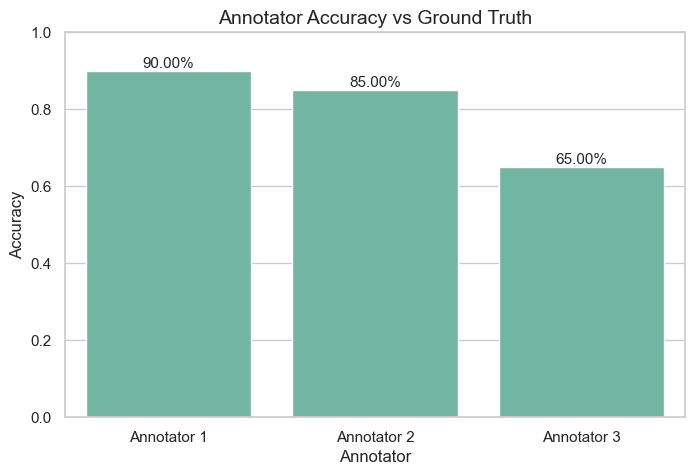

In [123]:
sns.set(style="whitegrid", palette="Set2")

annotators = [annotator1, annotator2, annotator3]
annotator_names = [f"Annotator {i+1}" for i in range(len(annotators))]
labels = ['Positive', 'Negative', 'Neutral', 'Mixed']

accuracies = []

for annotator in annotators:
    correct = sum(a == gt for a, gt in zip(annotator, ground_truth))
    accuracies.append(correct / len(ground_truth))

acc_df = pd.DataFrame({
    "Annotator": annotator_names,
    "Accuracy": accuracies
})

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=acc_df, x="Annotator", y="Accuracy")

# Add value labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.ylim(0, 1)
plt.title("Annotator Accuracy vs Ground Truth", fontsize=14)
plt.ylabel("Accuracy")
plt.show()


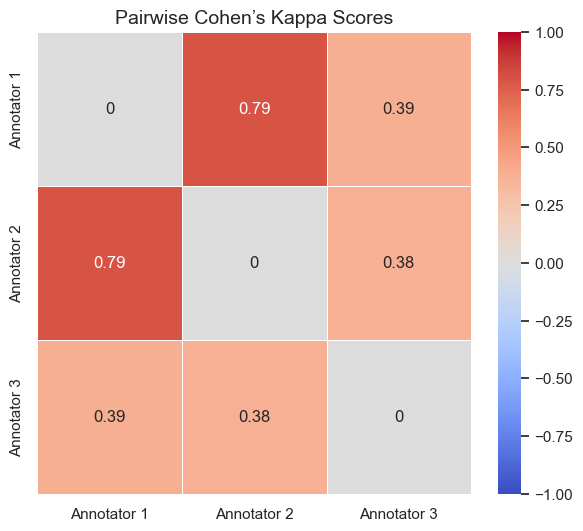

In [124]:
kappa_matrix = pd.DataFrame(
    np.zeros((len(annotators), len(annotators))),
    index=annotator_names,
    columns=annotator_names
)

for i in range(len(annotators)):
    for j in range(len(annotators)):
        if i != j:
            kappa_matrix.iloc[i, j] = cohen_kappa_score(
                annotators[i], annotators[j]
            )

plt.figure(figsize=(7, 6))
sns.heatmap(
    kappa_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title("Pairwise Cohen’s Kappa Scores", fontsize=14)
plt.show()


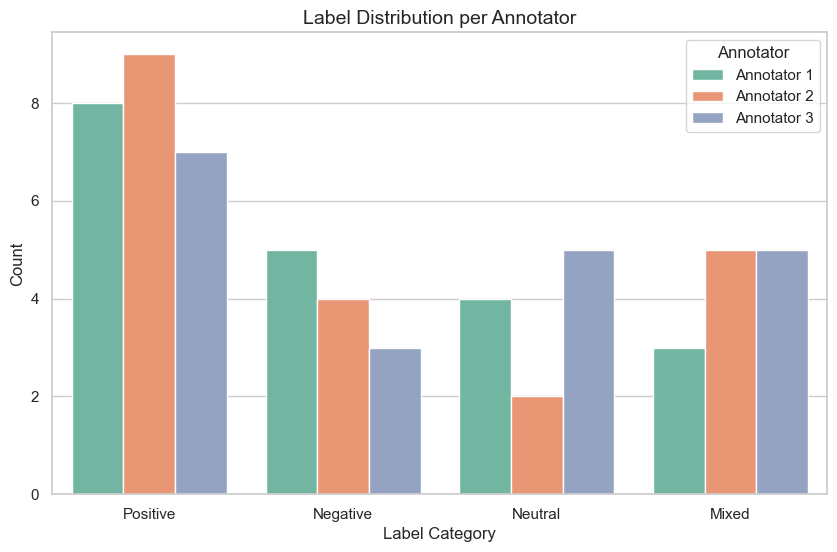

In [125]:
label_counts = []

for name, annotator in zip(annotator_names, annotators):
    counts = pd.Series(annotator).value_counts().reindex(labels, fill_value=0)
    df = counts.reset_index()
    df.columns = ["Label", "Count"]
    df["Annotator"] = name
    label_counts.append(df)

label_df = pd.concat(label_counts)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=label_df,
    x="Label",
    y="Count",
    hue="Annotator"
)
plt.title("Label Distribution per Annotator", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Label Category")
plt.legend(title="Annotator")
plt.show()


### My code

Annotator 1 Accuracy: 90.00%
Annotator 2 Accuracy: 85.00%
Annotator 3 Accuracy: 65.00%


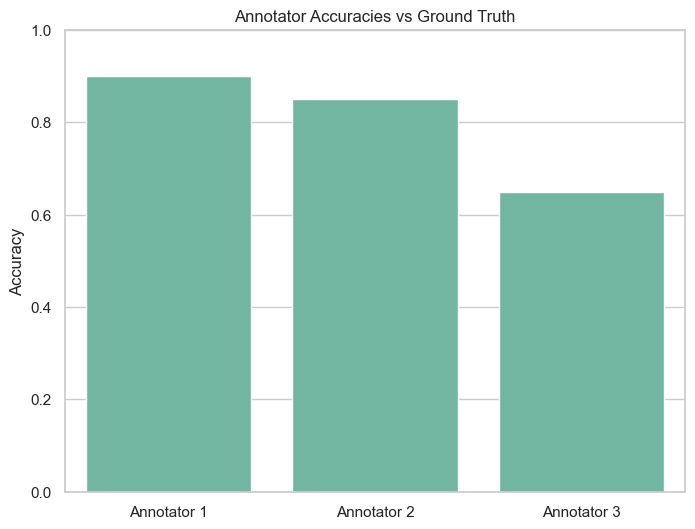

Pairwise Cohen's Kappa Scores:
Cohen's Kappa (Annotator 1 vs Annotator 2): 0.7895
Cohen's Kappa (Annotator 1 vs Annotator 3): 0.3878
Cohen's Kappa (Annotator 2 vs Annotator 3): 0.3793

Annotator 1 Label Counts:
Positive    8
Negative    5
Neutral     4
Mixed       3
Name: count, dtype: int64


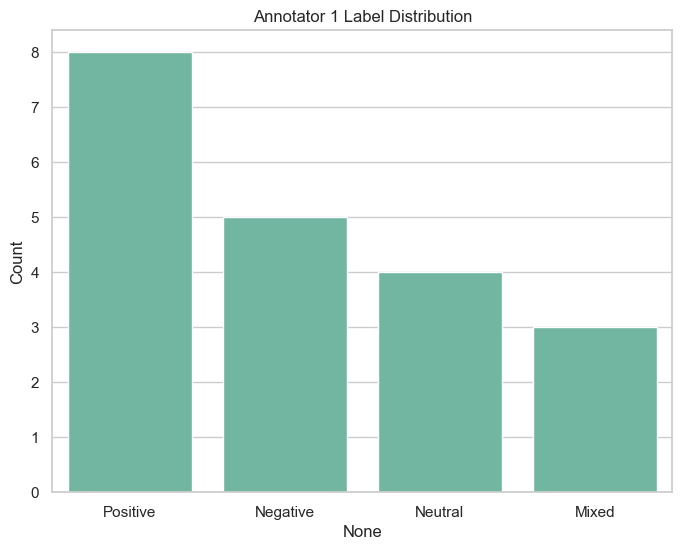


Annotator 2 Label Counts:
Positive    9
Negative    4
Neutral     2
Mixed       5
Name: count, dtype: int64


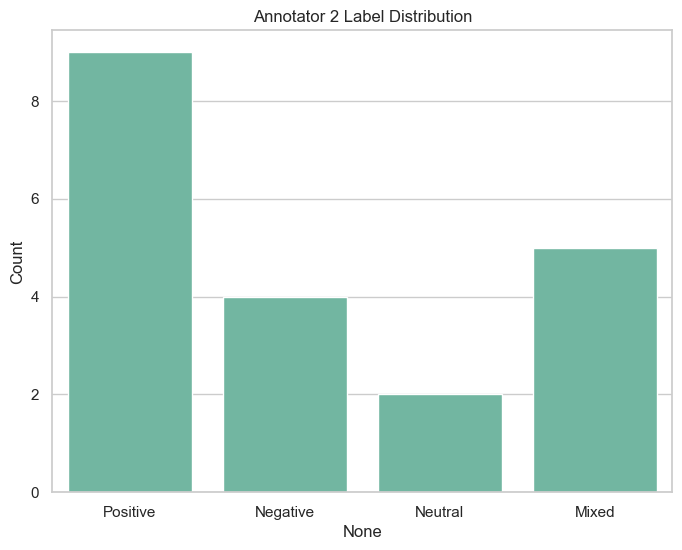


Annotator 3 Label Counts:
Positive    7
Negative    3
Neutral     5
Mixed       5
Name: count, dtype: int64


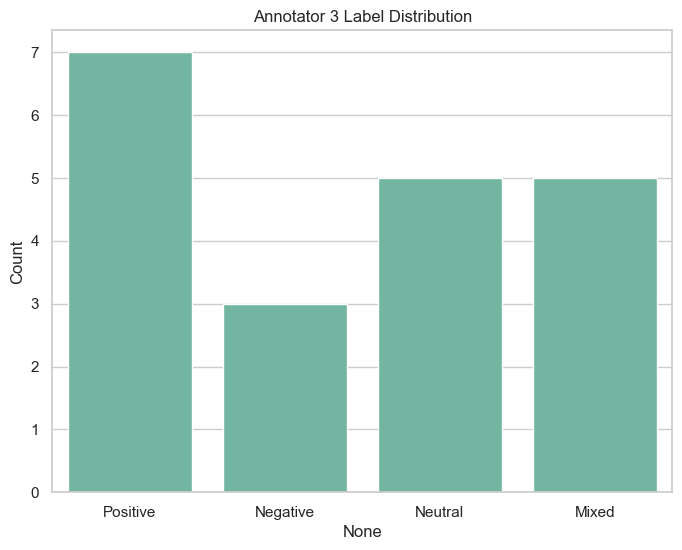

In [126]:
# TODO: Create a quality dashboard showing:
# 1. Each annotator's accuracy vs ground truth
# 2. Pairwise kappa scores
# 3. Number of labels per category for each annotator

# Your code here

# 1. Each annotator's accuracy vs ground truth
accuracies = []
for i, annotator in enumerate([annotator1, annotator2, annotator3]):
    correct = sum(a == gt for a, gt in zip(annotator, ground_truth))
    accuracy = correct / len(ground_truth)
    accuracies.append(accuracy)
    print(f"Annotator {i+1} Accuracy: {accuracy:.2%}")
# Bar plot for accuracies
plt.figure(figsize=(8, 6))
sns.barplot(x=[f'Annotator {i+1}' for i in range(3)], y=accuracies)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title("Annotator Accuracies vs Ground Truth")
plt.show()

# 2. Pairwise kappa scores
print("Pairwise Cohen's Kappa Scores:")
annotators = [annotator1, annotator2, annotator3]
for i in range(len(annotators)):
    for j in range(i + 1, len(annotators)):
        kappa = cohen_kappa_score(annotators[i], annotators[j])
        print(f"Cohen's Kappa (Annotator {i+1} vs Annotator {j+1}): {kappa:.4f}")

# 3. Number of labels per category for each annotator
labels = ['Positive', 'Negative', 'Neutral', 'Mixed']
for i, annotator in enumerate([annotator1, annotator2, annotator3]):
    counts = pd.Series(annotator).value_counts().reindex(labels, fill_value=0)
    print(f"\nAnnotator {i+1} Label Counts:")
    print(counts)
    # Bar plot for label counts
    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts.index, y=counts.values)
    plt.ylabel('Count')
    plt.title(f"Annotator {i+1} Label Distribution")
    plt.show()

---

## Challenge Problems

### Challenge 1: Krippendorff's Alpha

Implement Krippendorff's Alpha, which handles missing data and ordinal categories.

In [127]:
# Challenge: Implement Krippendorff's Alpha
# This metric handles:
# - Any number of annotators
# - Missing data
# - Different types of data (nominal, ordinal, interval, ratio)

# Your code here


### Challenge 2: Annotation Cost Estimator

In [128]:
# Challenge: Build a function that estimates annotation cost
# Input: number of items, task type, quality level (redundancy)
# Output: estimated cost in USD and time in hours

def estimate_annotation_cost(n_items, task_type, quality_level, domain='general'):
    """
    Estimate the cost and time for an annotation project.
    
    Args:
        n_items: Number of items to annotate
        task_type: 'text_classification', 'ner', 'bbox', 'segmentation'
        quality_level: 'low' (1 annotator), 'medium' (2), 'high' (3)
        domain: 'general' or 'expert'
    
    Returns:
        dict with cost_usd, time_hours, annotators_needed
    """
    # Your code here
    pass

# Test with:
# estimate_annotation_cost(10000, 'text_classification', 'high')


### Challenge 3: Label Studio API Integration

Read label studio API documentation here: https://api.labelstud.io/api-reference/introduction/getting-started

In [129]:
# Challenge: Write functions to interact with Label Studio API
# - Create a project
# - Import tasks
# - Export annotations

# Note: Requires running Label Studio locally
# pip install label-studio
# label-studio start

import requests

class LabelStudioClient:
    def __init__(self, url='http://localhost:8080', api_key=None):
        self.url = url
        self.api_key = api_key
        self.headers = {'Authorization': f'Token {api_key}'}
    
    def create_project(self, title, config):
        """Create a new annotation project."""
        # Your code here
        pass
    
    def import_tasks(self, project_id, tasks):
        """Import tasks to a project."""
        # Your code here
        pass
    
    def export_annotations(self, project_id, tasks, preannotated_from_fields=None):
        """Export annotations from a project."""
        # Your code here
        pass


---

## Summary

In this lab, you learned:

1. **Label Studio Setup**: Creating annotation interfaces with XML configs
2. **Annotation Guidelines**: Writing clear, comprehensive guidelines with edge cases
3. **Percent Agreement**: Simple but limited measure of annotator agreement
4. **Cohen's Kappa**: Agreement metric that accounts for chance (2 annotators)
5. **Fleiss' Kappa**: Extension for multiple annotators
6. **IoU**: Measuring agreement for spatial annotations
7. **Majority Voting**: Resolving disagreements between annotators

### Key Takeaways

- **Kappa >= 0.8** is the target for production annotation tasks
- Clear guidelines with examples reduce disagreements
- Multiple annotators + adjudication = higher quality labels
- Different metrics for different annotation types

### Next Week

Week 4: Optimizing Labeling with Active Learning, Weak Supervision, and LLMs!